# Analysis - The 2018 FIFA World Cup in Russia

## Technical Requirements are as follows.

1. Use Pandas to clean and format your data set(s)
2. Create a Jupyter Notebook describing the data exploration and cleanup process
3. Create a Jupyter Notebook illustrating the final data analysis
4. Use Matplotlib to create a total of 6-8 visualizations of your data (ideally, at least 2 per "question" you ask of your data)
5. Save PNG images of your visualizations to distribute to the class and instructional team, and for inclusion in your presentation
6. Optionally, use at least one API, if you can find an API with data pertinent to your primary research questions
7. Create a write-up summarizing your major findings. This should include a heading for each "question" you asked of your data, and under each heading, a short description of what you found and any relevant plots.

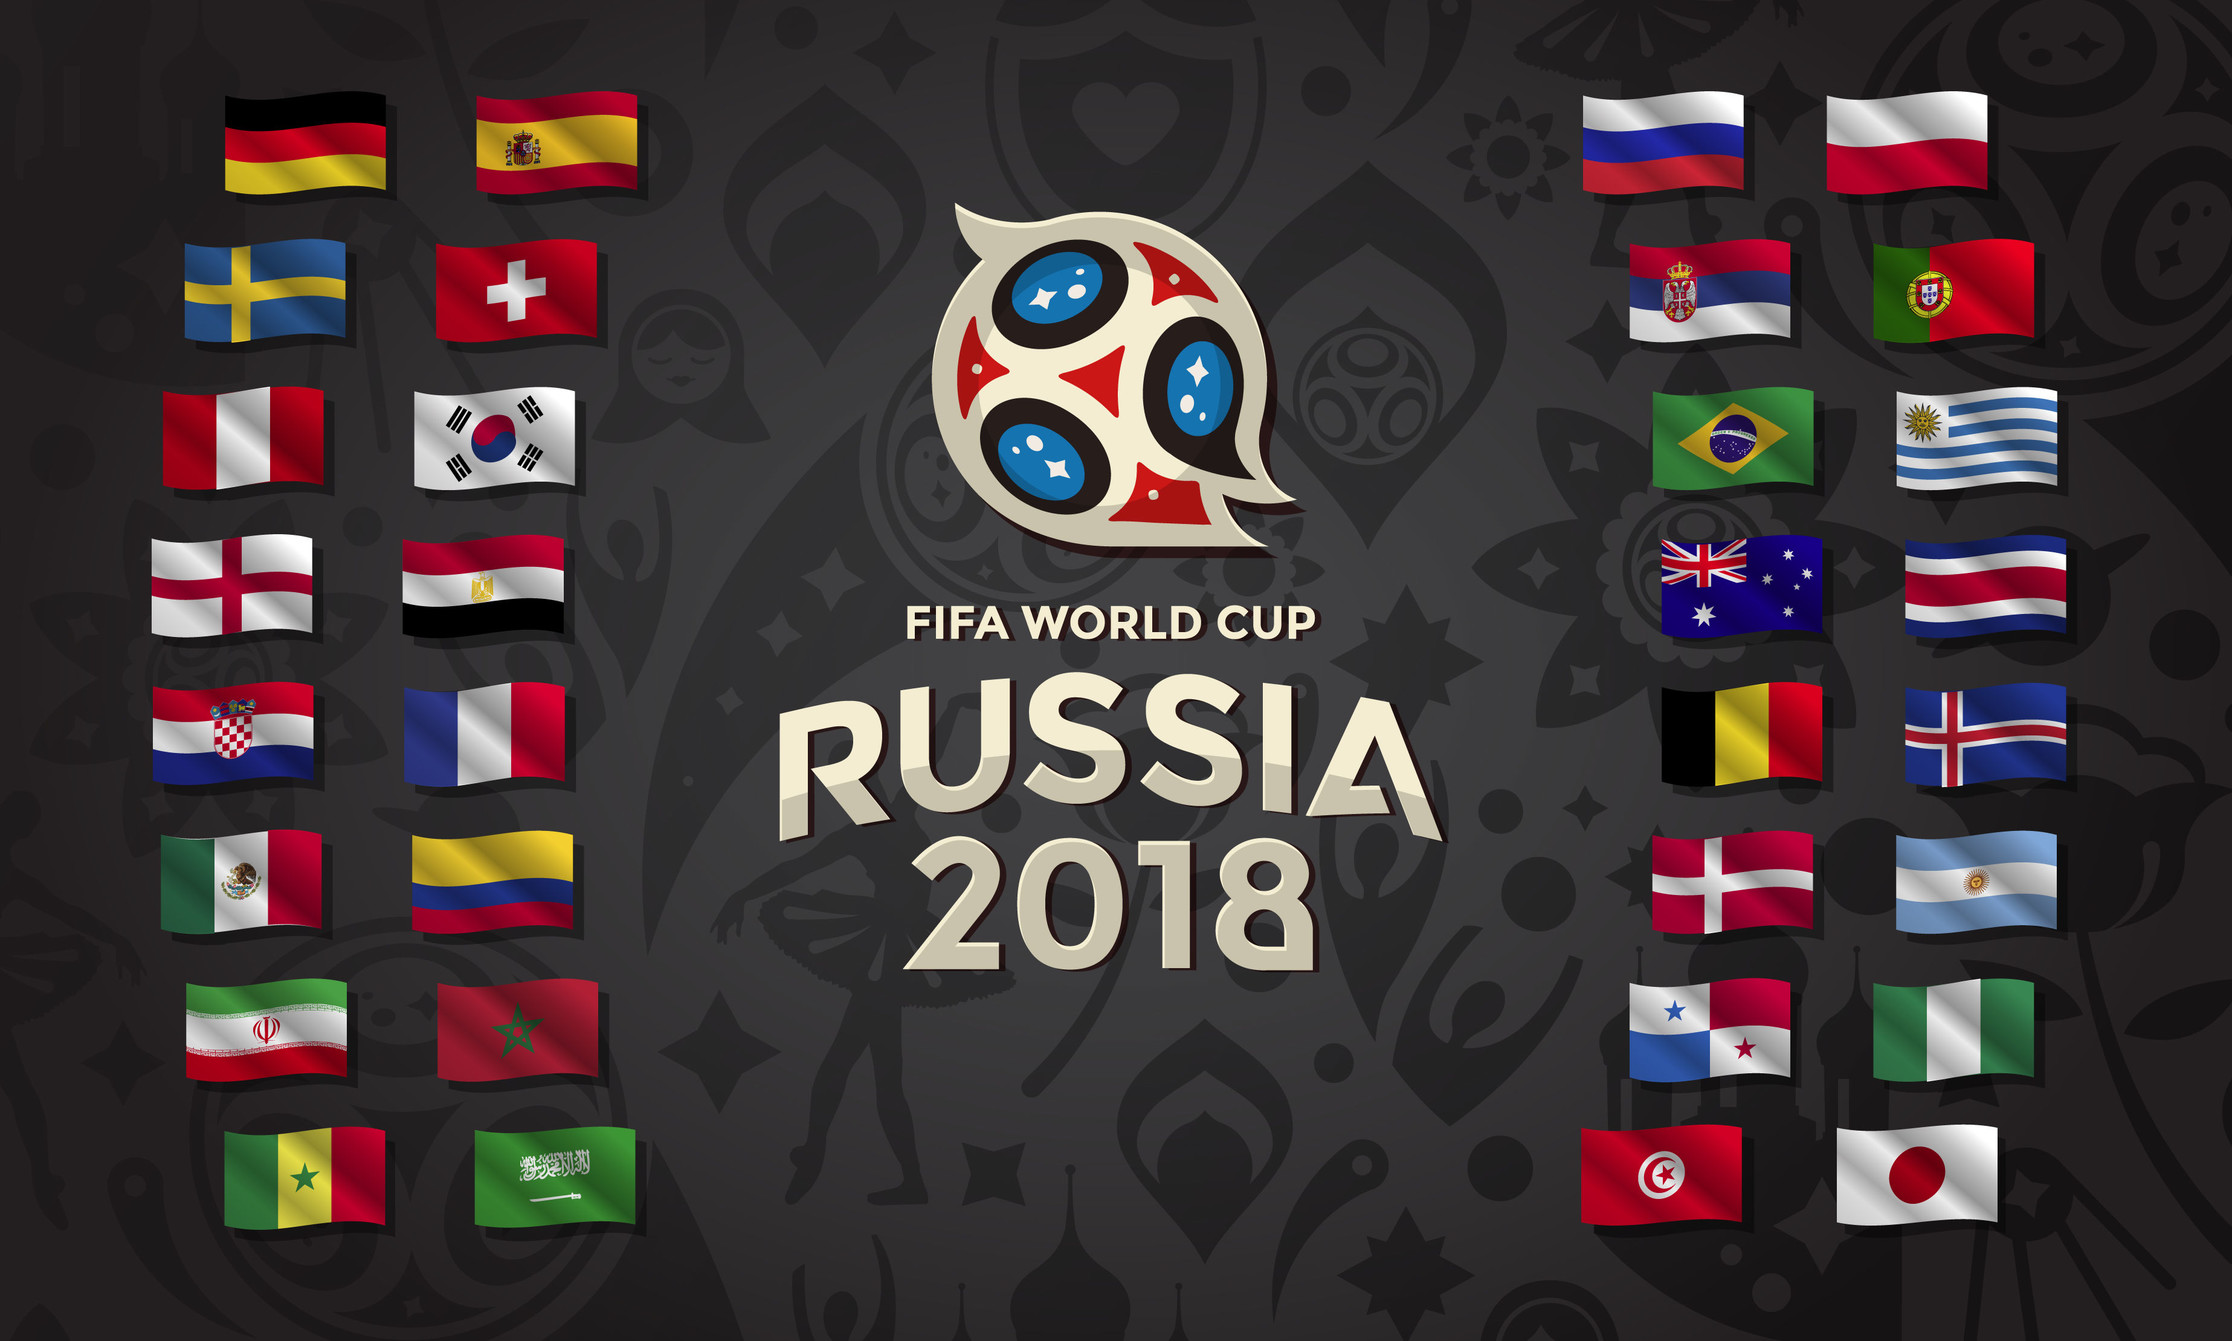

In [1]:
from IPython.display import Image
Image(filename= "Russia2018.jpg")

In [2]:
# Dependencies
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
## National teams at the 2018 FIFA World Cup in Russia by average age of players (in years)
# Source File: https://www.kaggle.com/jonathanbouchet/fifa-world-cup-2018-players-stats/data
# Dataset #1  Read CSV
fifa_squads = pd.read_csv("2018 FIFA World Cup Squads2.csv", encoding = "ISO-8859-1")
fifa_players = pd.read_csv("wc2018-players2.csv", encoding = "ISO-8859-1")

In [4]:
# List of Final 8 FIFA WC2018 Teams/Countries
final8 = ["Belgium","Brazil","Croatia", "England", "France", "Russia", "Sweden", "Uruguay"]

In [5]:
# Merge the two datasets together
combined_fifa_data = pd.merge(fifa_squads, fifa_players, on="Index Field")
merged_df = pd.DataFrame(combined_fifa_data)
merged_df.index = merged_df["Index Field"]
#del merged_df["Team_y"]
del merged_df["Pos."]
del merged_df["#"]
del merged_df["Birth Date"]
del merged_df["Player Count"]
del merged_df["Club_x"]
del merged_df["FIFA Popular Name"]
del merged_df["Index Field"]
del merged_df["Shirt Name"]
merged_df.tail(1)

,Team_x,Group,Squad Number,Position,Player,Date Of Birth,Age,Caps,Goals,Team_y,Club_y,Height,Weight
Index Field,,,,,,,,,,,,,
Senegal23GK34217,Senegal,H,23,GK,Alfred Gomis,9/5/1993,24,1,0,Senegal,SPAL Ferrara (ITA),196,80


In [6]:
# Groupby Team
df1 = pd.DataFrame(merged_df)
g1 = df1.groupby( ["Team_x"] ).mean()
# g1.tail(1)
g1.reset_index(inplace = True)
g1.head(2)

,Team_x,Squad Number,Age,Caps,Goals,Height,Weight
0,Argentina,12.0,28.695652,36.521739,7.478261,178.434783,75.565217
1,Australia,12.0,27.608696,29.086957,5.217391,180.869565,77.739130


In [7]:
g1.set_index('Team_x', inplace=True)

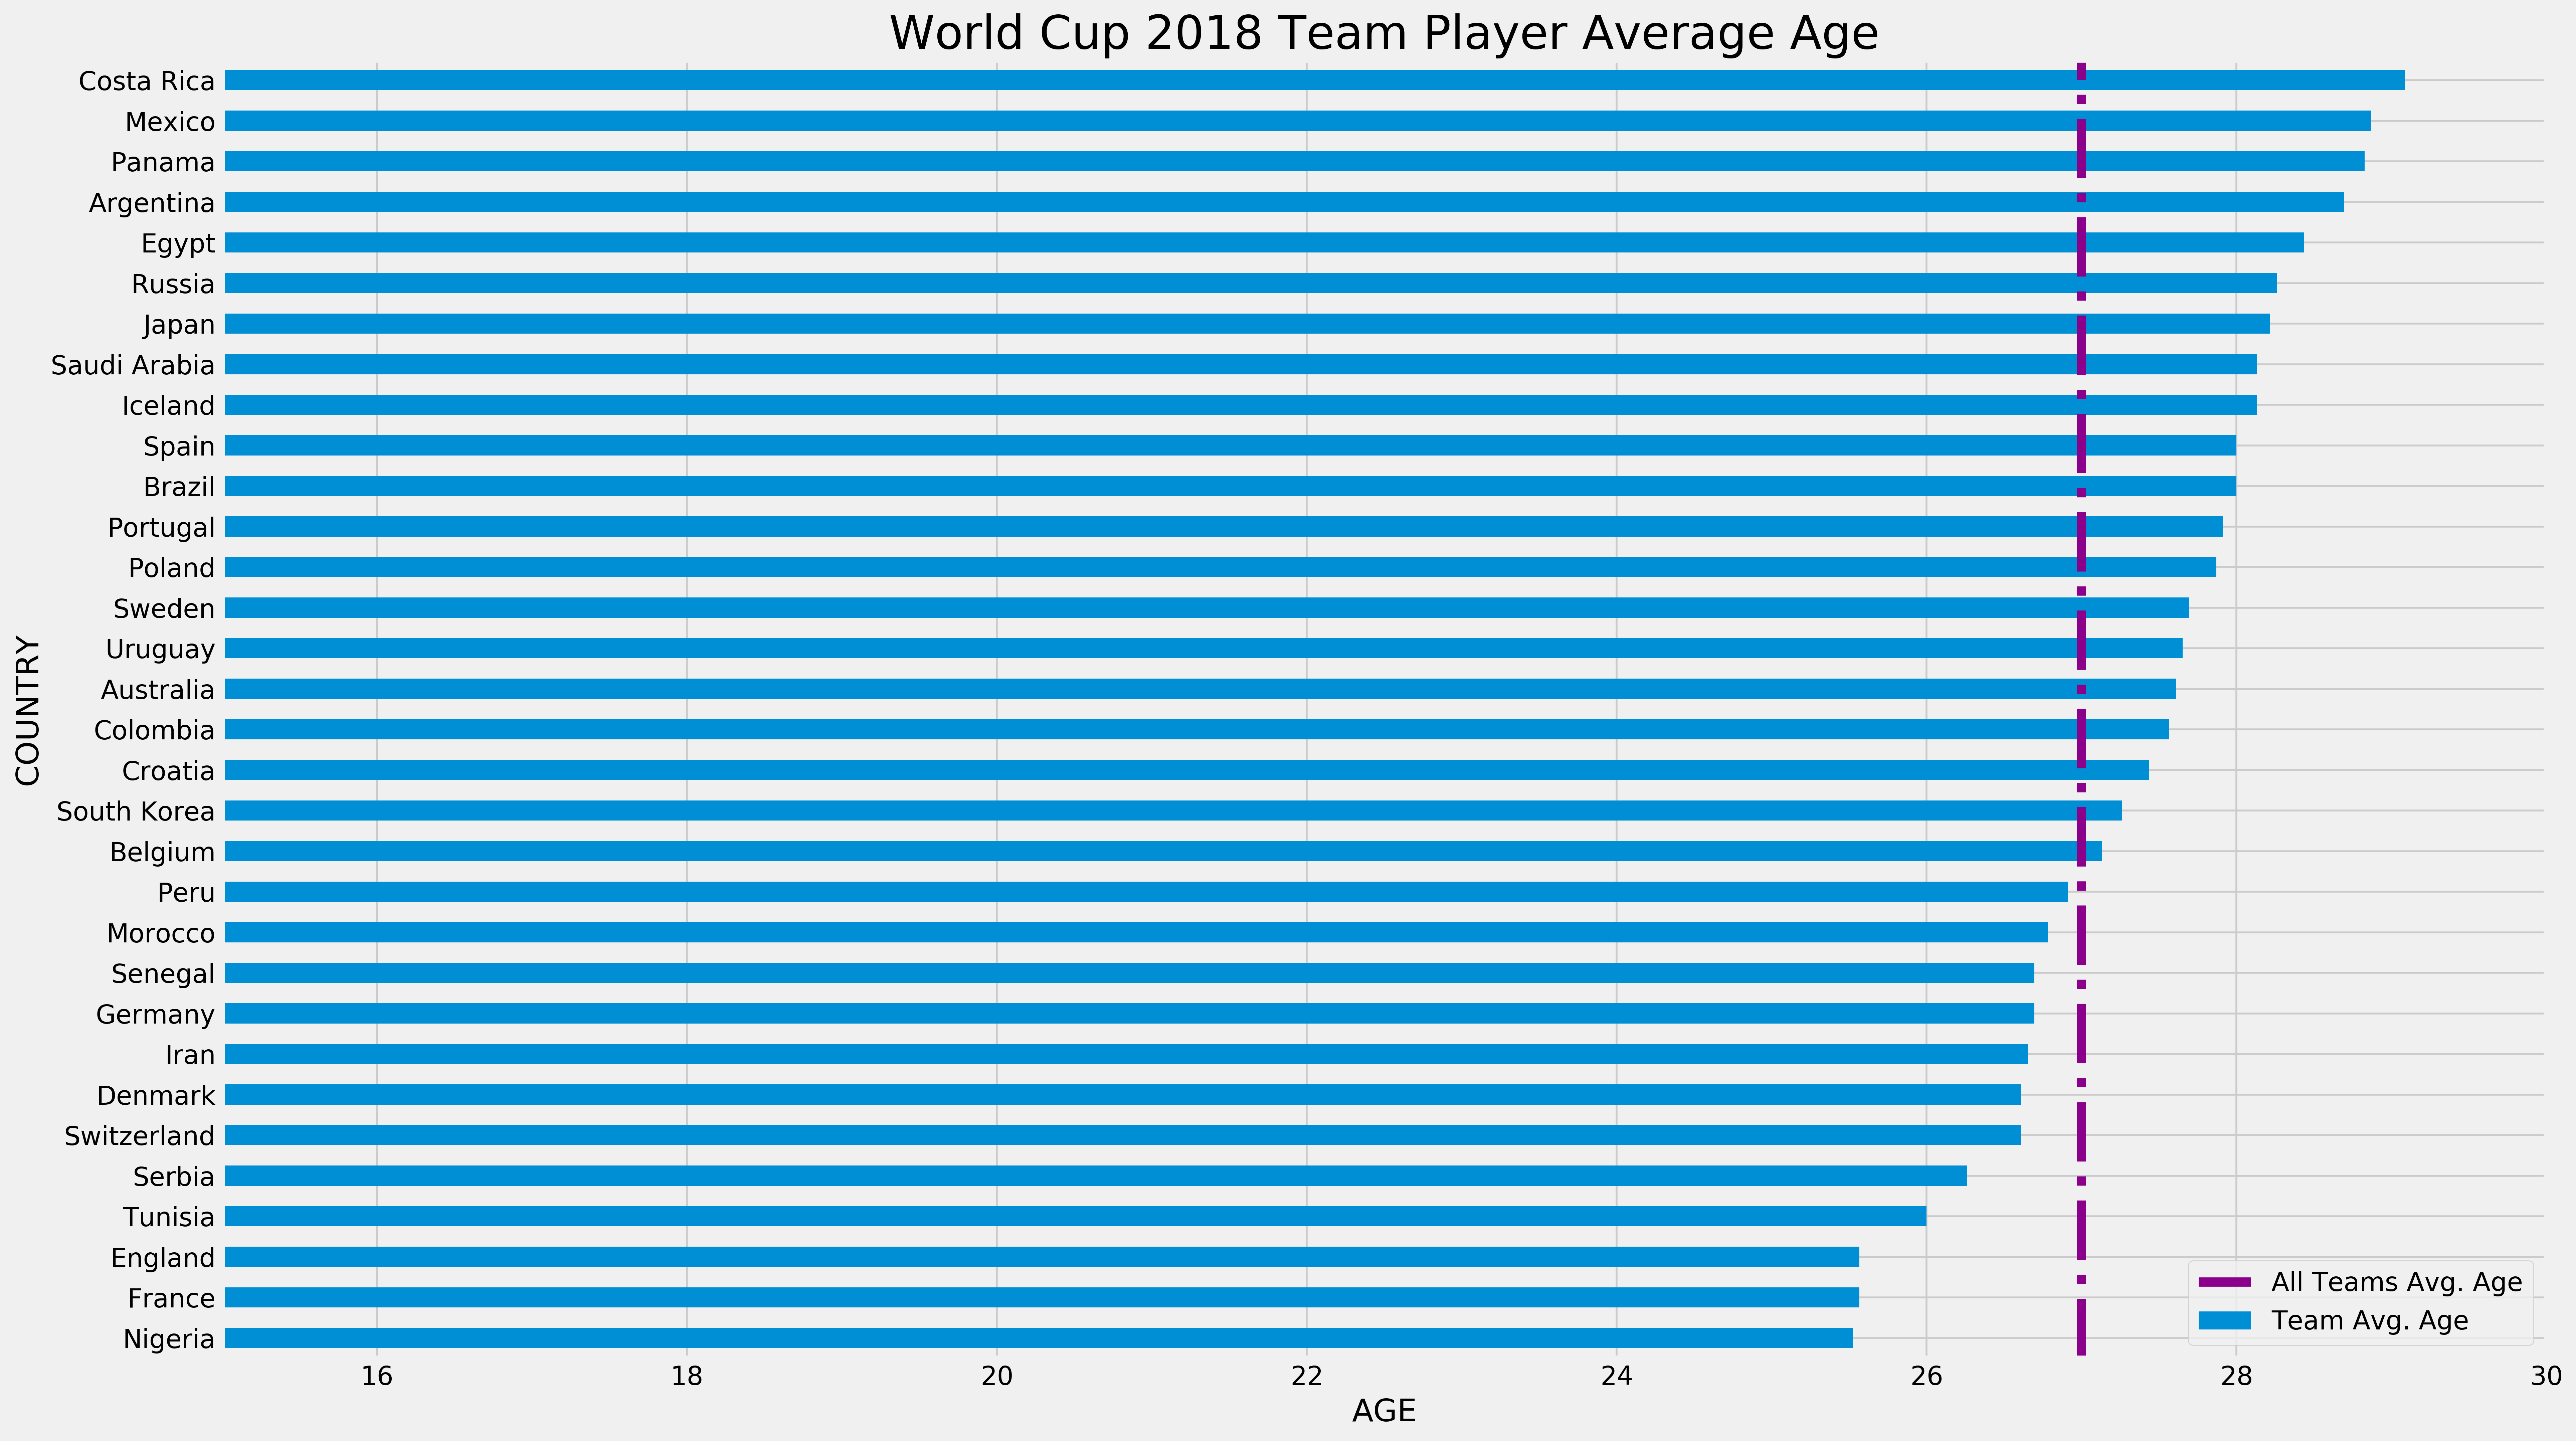

In [8]:
# Average Age for Teams
plt.rcParams["figure.dpi"] = 400
plt.style.use('fivethirtyeight')
g1.sort_values(by="Age", inplace=True)

ax = g1[['Age']].plot(figsize = (20, 12),kind="barh")
ax.set_xlabel("AGE")
ax.set_ylabel("COUNTRY")
ax.set_xlim(15,30)
plt.title("World Cup 2018 Team Player Average Age", fontsize=25)
plt.axvline(27,c="darkmagenta",linestyle="dashdot", linewidth=5)  #Average Age for ALL Players
plt.legend(["All Teams Avg. Age","Team Avg. Age"], loc=0)
plt.savefig("Avg_Age.png",orientation='landscape',format="png",dpi=100)

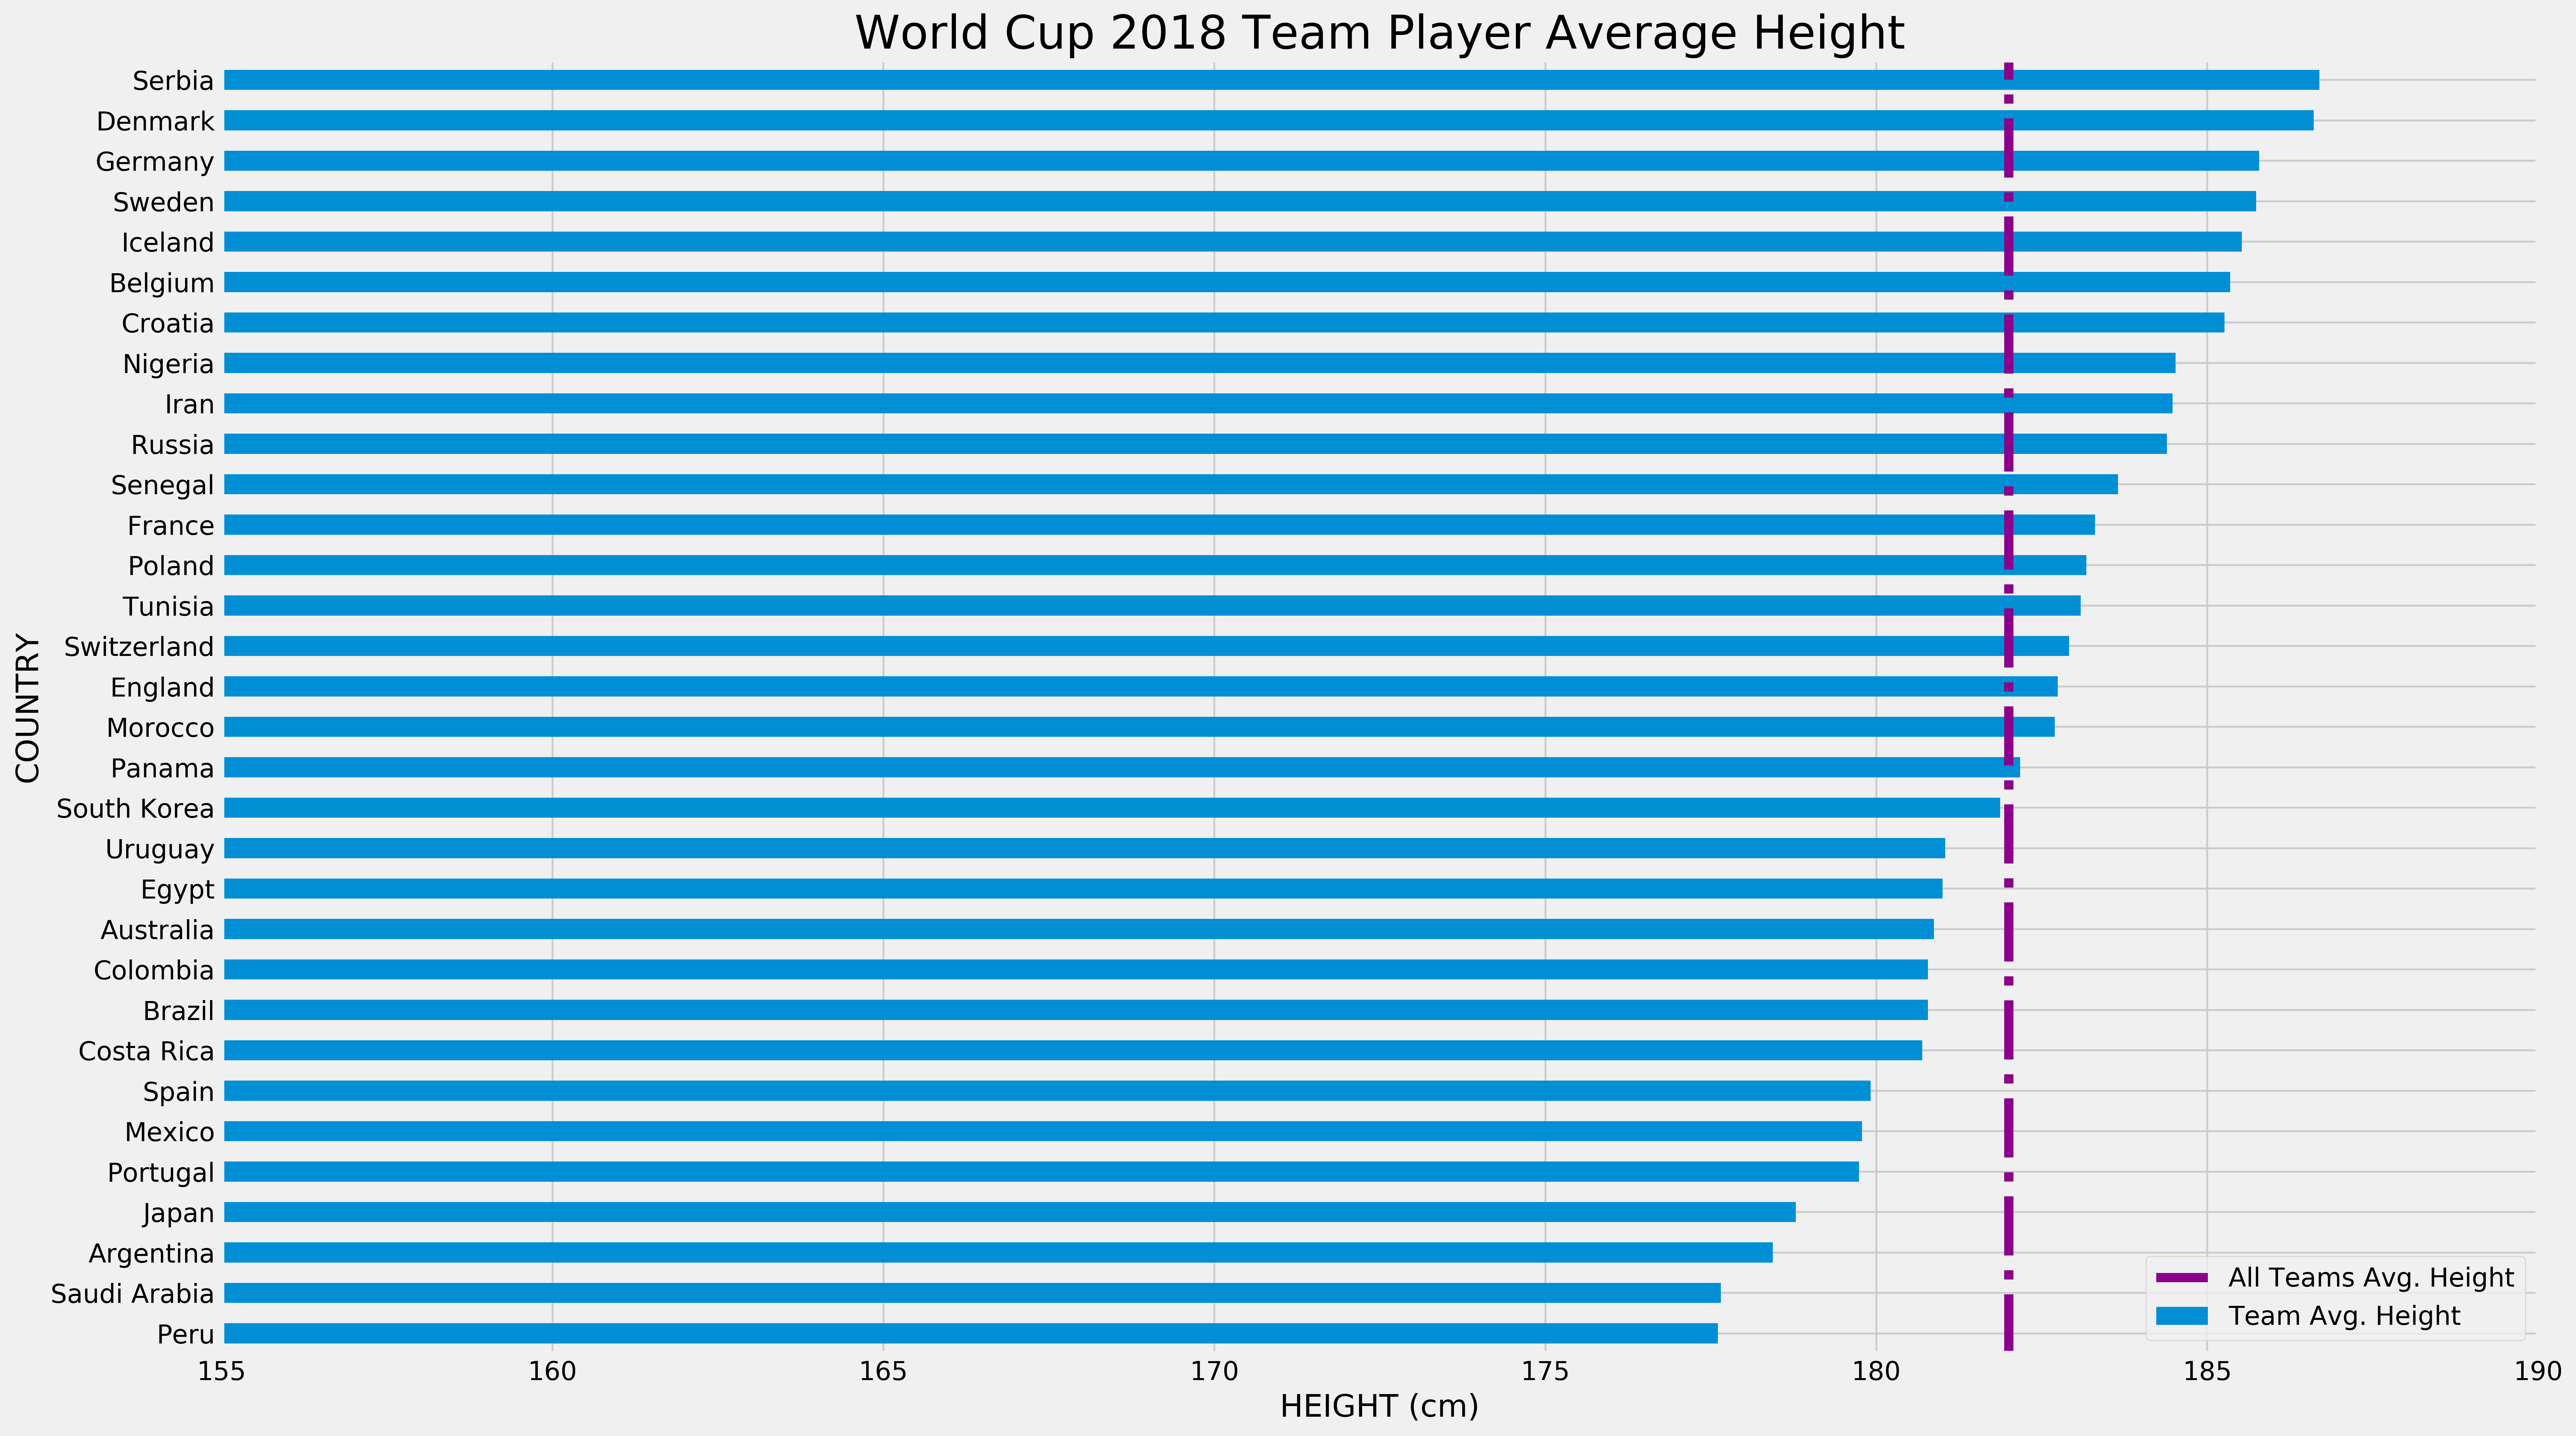

In [9]:
# Average Height for Teams
plt.rcParams["figure.dpi"] = 400
plt.style.use('fivethirtyeight')
g1.sort_values(by="Height", inplace=True)

ax = g1[["Height"]].plot(figsize = (20, 12),kind="barh")
ax.set_xlabel("HEIGHT (cm)")
ax.set_ylabel("COUNTRY")
ax.set_xlim(155,190)
plt.title("World Cup 2018 Team Player Average Height", fontsize=25)
plt.axvline(182,c="darkmagenta",linestyle="dashdot", linewidth=5)  #Average for ALL Players
plt.legend(["All Teams Avg. Height","Team Avg. Height"], loc=0)
plt.savefig("Avg_Height.png",orientation='landscape',format="png",dpi=100)

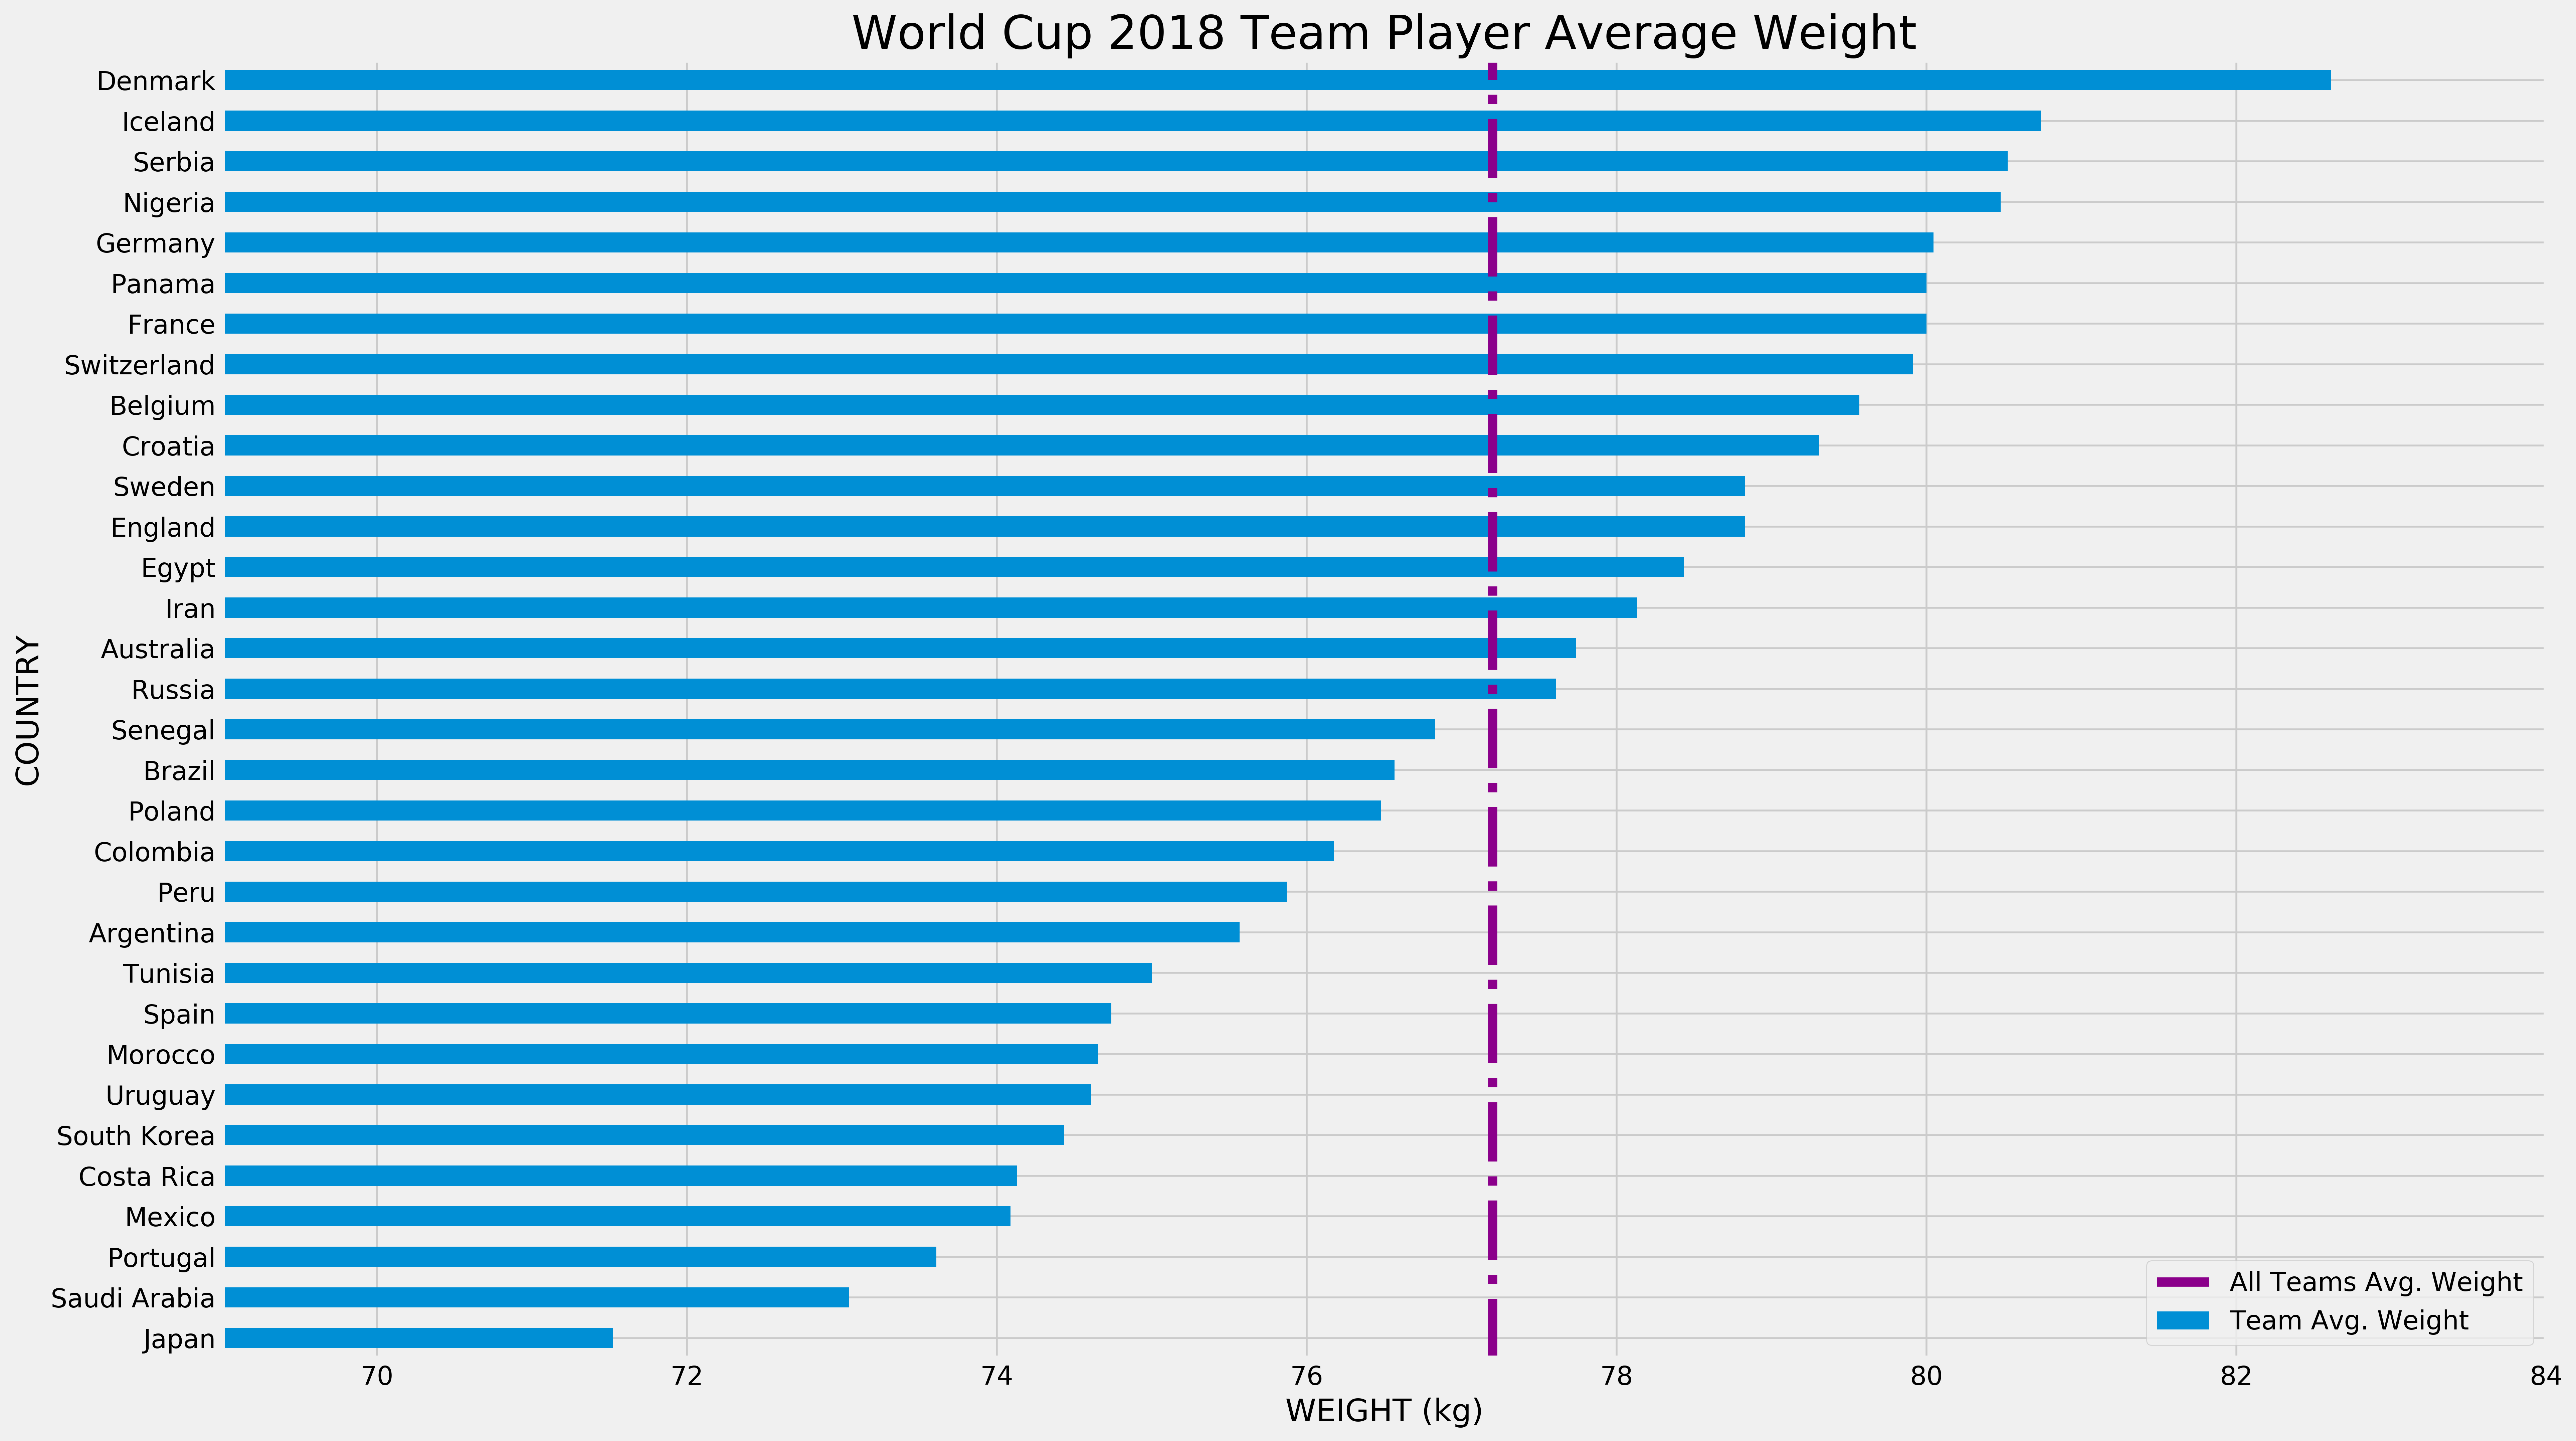

In [10]:
# Average Weight for Teams
plt.rcParams["figure.dpi"] = 400
plt.style.use('fivethirtyeight')
g1.sort_values(by="Weight", inplace=True)

ax = g1[["Weight"]].plot(figsize = (20, 12),kind="barh")
ax.set_xlabel("WEIGHT (kg)")
ax.set_ylabel("COUNTRY")
ax.set_xlim(69,84)
plt.title("World Cup 2018 Team Player Average Weight", fontsize=25)
plt.axvline(77.2,c="darkmagenta",linestyle="dashdot", linewidth=5)  #Average for ALL Players
plt.legend(["All Teams Avg. Weight","Team Avg. Weight"], loc=0)
plt.savefig("Avg_Weight.png",orientation='landscape',format="png",dpi=100)

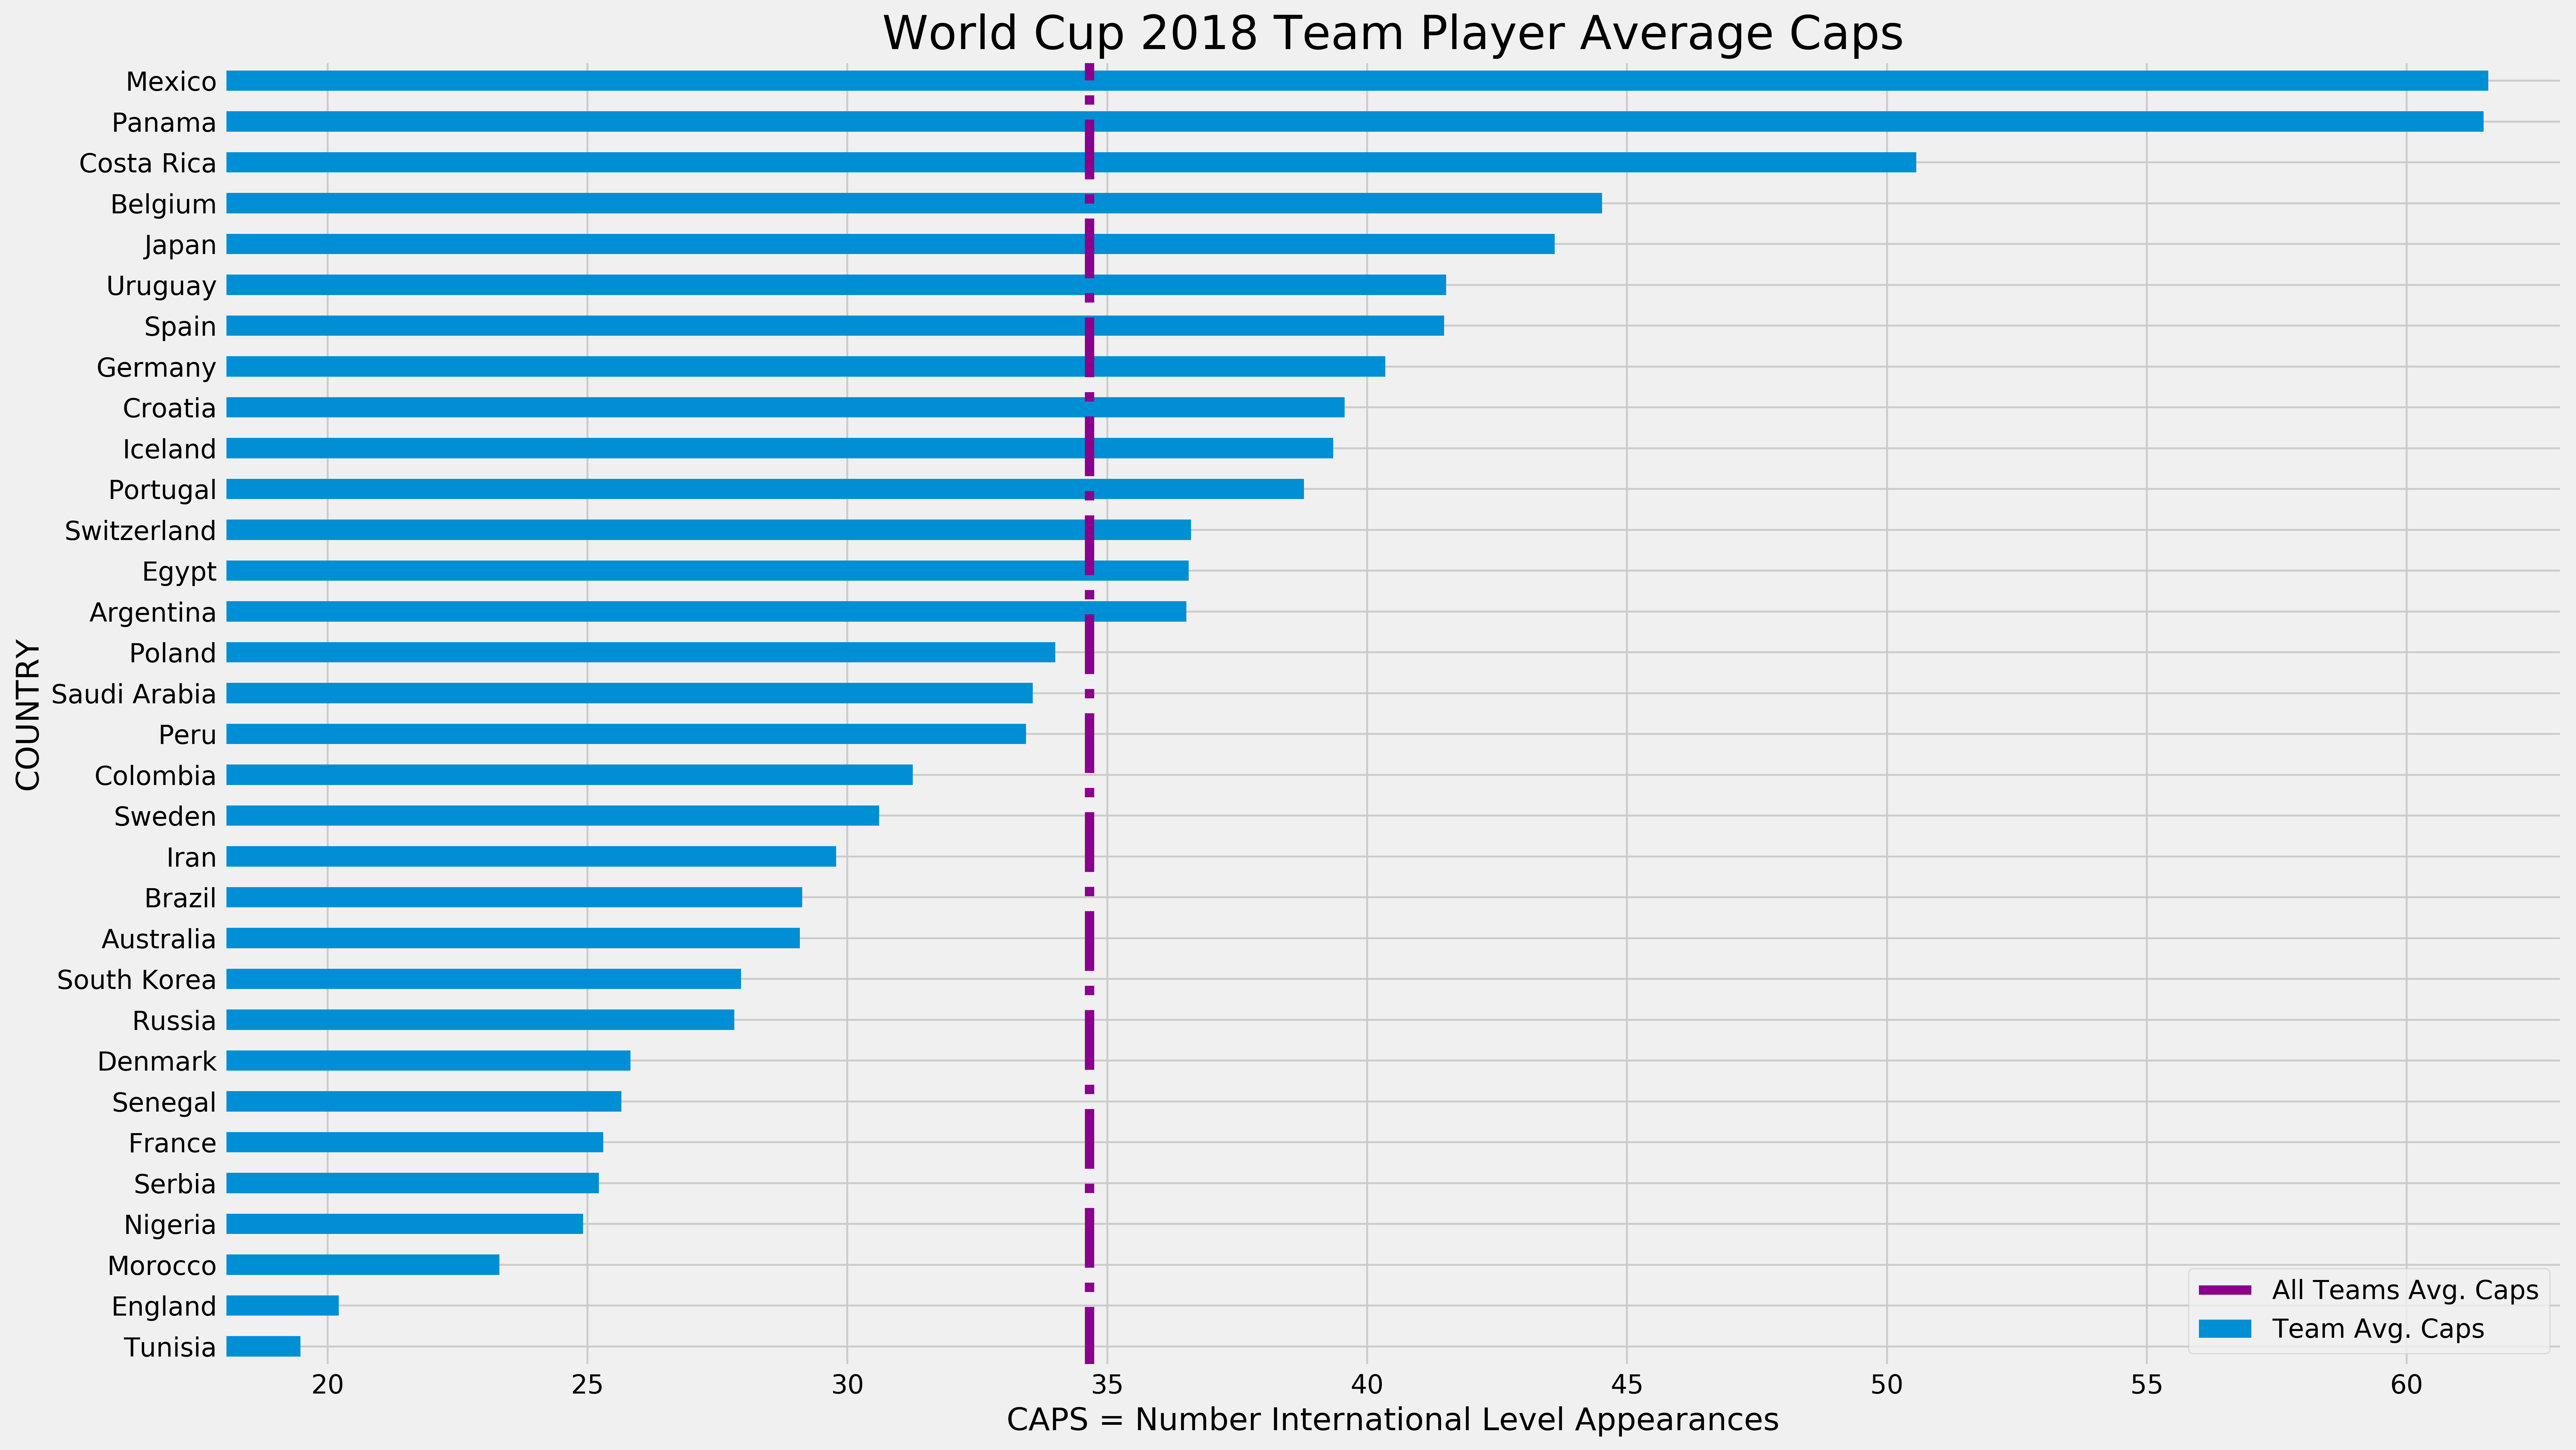

In [11]:
# Average Caps for Teams
plt.rcParams["figure.dpi"] = 400
plt.style.use('fivethirtyeight')
g1.sort_values(by="Caps", inplace=True)

ax = g1[["Caps"]].plot(figsize = (20, 12),kind="barh")
ax.set_xlabel("CAPS = Number International Level Appearances")
ax.set_ylabel("COUNTRY")
ax.set_xlim(18,63)
plt.title("World Cup 2018 Team Player Average Caps", fontsize=25)

plt.axvline(34.66,c="darkmagenta",linestyle="dashdot", linewidth=5)  #Average for ALL Players
plt.legend(["All Teams Avg. Caps","Team Avg. Caps"], loc=0)
plt.savefig("Avg_Caps.png",orientation='landscape',format="png",dpi=100)